# Predicting the Most Valuable Home Improvement Projects In King County

## Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a linear regression model than can predict which home improvement projects will add to the sale value of homes.

## Business Problem

A client in King County, WA wants to advise homeowners on which features will add to the sale value of their homes.

## Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Will enclosing a porch increase the sale price of a home?

Question 2: Is converting a garage to a bedroom a good way to increase the sale price of a home?

Question 3: Will upgrading to a forced-air heating system increase the sale price of a home?

## Previewing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
home_data = pd.read_csv('../../data/processed/home_data.csv')
home_data.head(2)

,Unnamed: 0,Major,Minor,SalePrice,DocumentDate,Stories,BldgGrade,Bedrooms,Bathrooms,SqFtTotLiving,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,DistrictName,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
0,0,638580,110,190000,07/14/2015,1.0,7.0,4.0,2.0,2130.0,...,0.0,300.0,5.0,10534.0,23.0,SeaTac,1.0,2.0,0.0,0.0
1,1,894677,240,818161,12/21/2016,2.0,9.0,4.0,3.0,2450.0,...,0.0,60.0,5.0,3813.0,26.0,KIRKLAND,1.0,0.0,0.0,0.0


In [3]:
#Dropping the Unnamed: 0 column since no valuable data is provided
home_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173128 entries, 0 to 173127
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              173128 non-null  int64  
 1   Minor              173128 non-null  int64  
 2   SalePrice          173128 non-null  int64  
 3   DocumentDate       173128 non-null  object 
 4   Stories            173128 non-null  float64
 5   BldgGrade          173128 non-null  float64
 6   Bedrooms           173128 non-null  float64
 7   Bathrooms          173128 non-null  float64
 8   SqFtTotLiving      173128 non-null  float64
 9   SqFtTotBasement    173128 non-null  float64
 10  SqFtOpenPorch      173128 non-null  float64
 11  SqFtEnclosedPorch  173128 non-null  float64
 12  SqFtDeck           173128 non-null  float64
 13  HeatSystem         173128 non-null  float64
 14  SqFtLot            173128 non-null  float64
 15  Township           173128 non-null  float64
 16  Di

In [6]:
home_data.describe()

,Major,Minor,SalePrice,Stories,BldgGrade,Bedrooms,Bathrooms,SqFtTotLiving,SqFtTotBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
count,173128.000000,173128.000000,1.731280e+05,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000,1.731280e+05,173128.000000,173128.000000,173128.000000,173128.000000,173128.000000
mean,450000.293650,1544.006123,7.432676e+05,1.552063,7.733365,3.460538,2.640116,2194.646302,469.046907,79.311966,5.858469,135.365400,4.970115,4.022123e+04,23.793188,1.013562,1.263967,0.217342,0.030694
std,288477.614253,2824.528942,9.103075e+05,0.541694,1.199443,0.975715,1.045961,1009.484465,582.078240,133.937209,39.415613,399.453401,1.076105,7.281323e+05,1.657781,0.194392,0.963894,0.570754,0.172488
min,100.000000,1.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000e+02,19.000000,0.000000,0.000000,0.000000,0.000000
25%,202306.000000,115.000000,3.970000e+05,1.000000,7.000000,3.000000,2.000000,1470.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000e+03,23.000000,1.000000,0.000000,0.000000,0.000000
50%,382600.000000,325.000000,5.849500e+05,1.500000,8.000000,3.000000,3.000000,2000.000000,0.000000,40.000000,0.000000,0.000000,5.000000,7.500000e+03,24.000000,1.000000,2.000000,0.000000,0.000000
75%,725595.000000,1015.000000,8.390000e+05,2.000000,8.000000,4.000000,3.000000,2730.000000,940.000000,110.000000,0.000000,210.000000,5.000000,1.069200e+04,25.000000,1.000000,2.000000,0.000000,0.000000
max,990600.000000,9694.000000,6.250000e+07,4.000000,13.000000,24.000000,16.000000,14980.000000,5610.000000,11570.000000,2330.000000,140000.000000,8.000000,2.330525e+07,26.000000,4.000000,2.000000,3.000000,1.000000


These are large datasets, containing more 185098 entries and 24 columns. Almost all of the columns contain numeric data, which is convenient for linear regression. A look at the distribution of variables in the dataset:

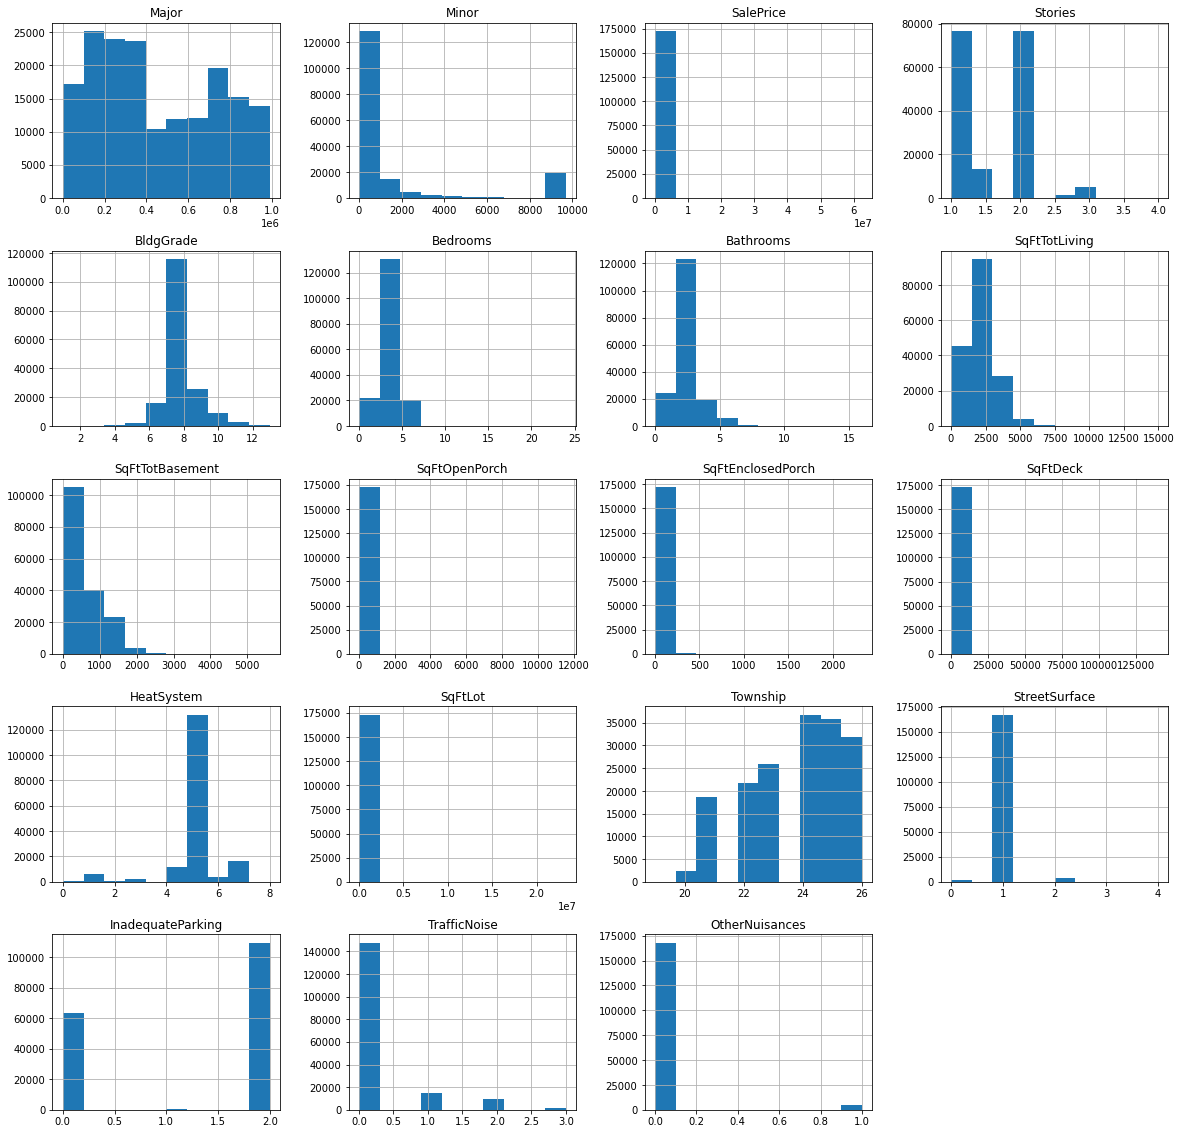

In [7]:
home_data.hist(figsize=(20,20));

I will check for any missing values:

In [9]:
for column in list(home_data.columns):
    print(column, sum(home_data[column].isnull()))

Major 0
Minor 0
SalePrice 0
DocumentDate 0
Stories 0
BldgGrade 0
Bedrooms 0
Bathrooms 0
SqFtTotLiving 0
SqFtTotBasement 0
SqFtOpenPorch 0
SqFtEnclosedPorch 0
SqFtDeck 0
HeatSystem 0
SqFtLot 0
Township 0
DistrictName 0
StreetSurface 0
InadequateParking 0
TrafficNoise 0
OtherNuisances 0


C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


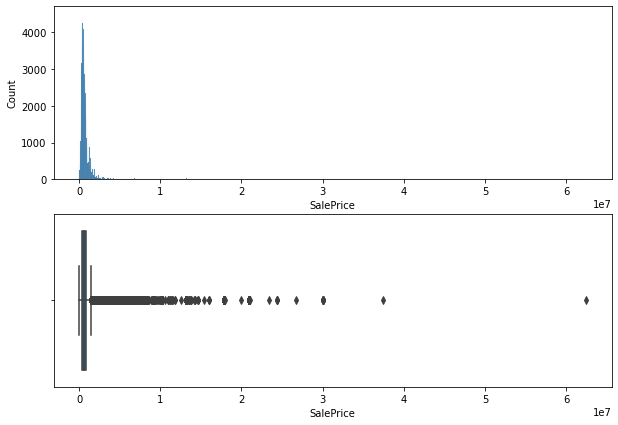

In [15]:
x = home_data.SalePrice
fig, ax = plt.subplots(2,1, figsize=(10,7))
sns.histplot(x, ax = ax[0])
sns.boxplot(x, ax= ax[1]);

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


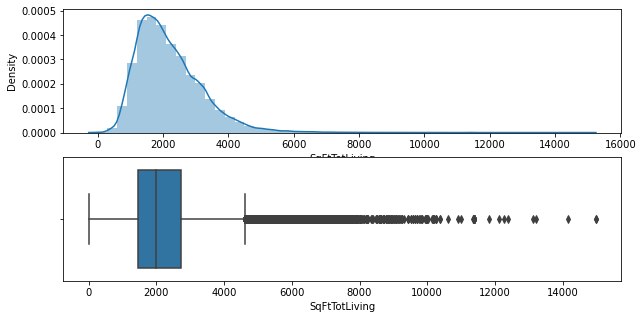

In [16]:
x = home_data.SqFtTotLiving
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(x, ax = ax[0])
sns.boxplot(x, ax= ax[1]);

## Feature Engineering
To prepare the features for my model I will have:

1- Checked for and remove extreme outliers in the data.

2- One-hot encoded binned data (since categorical data are on a scale and are treated as continuous).

3- Normalized to account for heteroskedastic and skewed data and place all features on the one scale to compare coefficients.

### Outliers

Outliers (rogue data or variables that differ greatly from the majority of the data points) should be retained if they have the potential to reveal useful information about relationships in our data. After careful consideration I've decided to remove the outliers of the 'Bedrooms' and 'Bathrooms' columns because if a home in the dataset has upwards of 5 bathrooms and more than 10 bedrooms for example, then it's most likely that they are larger units that would be beyond the scope of this particular analysis. For this reason, I'll remove the rows that contain outlier values for these two columns.

In [ ]:
count = 0
bath_outliers = []
mean = np.mean(housing_info['Bathrooms'])
max_distance = np.std(housing_info['Bathrooms']) * 3 

for idx, row in housing_info['Bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        housing_info.drop(idx, inplace=True)
count

In [ ]:
count = 0
bed_outliers = []
mean = np.mean(housing_info['Bedrooms'])
max_distance = np.std(housing_info['Bedrooms']) * 3 

for idx, row in housing_info['Bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        housing_info.drop(idx,inplace=True)
count

After dropping just under 1900 'Bathroom' outliers, 938 'Bedroom' outliers remained: removing these outliers most likely also excluded removed extreme values for other variables.

### One-Hot Encoding

The main variable I would expect to be highly related with price, but does not have a clear linear relationship is 'Condition', whose values are on a scale of 1 ('poor') to 5 ('very good). As seen in the scatterplot below, in terms of price, 'average' houses tend to perform best.

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing_info['Condition'], housing_info['SalePrice'])
plt.title('Condition and Price', fontsize=15)

This could be owed to the fact that conditions are relative to age and grade ( an evaluation of the construction materials and level of craftsmanship used to build houses). An expensive, impeccably designed new construction could be given an 'average' rating if some functional adjustments are required. As we can see in the scatterplot below, average condition houses also tend to have the highest grade rating.

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing_info['Condition'], housing_info['BldgGrade'])
plt.title('House Condition and Grade', fontsize=15)

Since there may be a clearer linear relationship between specific condition values and prices, I will explore more thoroughly by one-hot encoding the variable.

In [ ]:
one_hot = pd.get_dummies(housing_info['Condition'], drop_first=True) #drop a column to avoid dummy variable trap
housing_info = housing_info.drop('Condition',axis = 1) #drop the original column 
housing_info = housing_info.join(one_hot) #joins the new variables to the dataframe

Now I will take a look to see if we get a clearer picture of linear relationships by drawing up a scatterplot.

In [ ]:
price = housing_info['SalePrice']
two = housing_info['two'] = housing_info[2] 
three = housing_info['three'] = housing_info[3] 
four = housing_info['four'] = housing_info[4] 
five = housing_info['five'] = housing_info[5] 

fig = plt.figure()
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

fig.suptitle('House Condition and Price', fontsize=18, y=1.1)
fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

plot = axes[0][0].scatter(two, price, c = price, marker = "o")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "o")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "o")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "o")
axes[1][1].set_xlabel('Condition 5')


fig.tight_layout()
plt.show()

There are linear relationships for each column as seen in the plot above, with Condition 3 and 4 showing a strong relationship.

To see which variables should be included in my model, I should investigate which variables are most strongly correlated with price. We want to make sure that there is no multicollinearity (meaning they can't be accurately predicted by other explanatory variables) among the explanatory variables. Below is a correlation matrix visualization of price and continuous variables in the dataset.

In [ ]:
#create a list of meaningfully continuous x variables for our features
features = ['Bedrooms', 'Bathrooms', 'SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor', 'SqFtEnclosedPorch',
             'SqFtLot', 'SqFtUpperFloor','Stories', 'SqFtTotBasement','BldgGrade','TrafficNoise', 'OtherNuisances',
             'HeatSystem', 'YrBuilt', 'HeatSource', 2, 3, 4, 5]

#update dataframe to only include the above variables
df_clean = housing_info[features]
df_clean['Price'] = housing_info['SalePrice']
housing_info = df_clean

In [ ]:
corr = housing_info.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=15, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

As seen in this heatmap, variables related to the size of the home (for example, total sqft, number of bedrooms and bathrooms) are highly correlated with each other. In general, we shouldn't two have x variables whose correlation exceeds .8 in the same model, however, variables that are correlated with the y variable should be. 

### Normalizing the Data with Log Transformations

In order to meet the normal assumption since many of the features have skewed data, I will normalize the data by log transforming and then normalizing and scaling. Since after removing outliers, the model's residuals were not normally distributed and did not meet the normality assumption, which was was apparent with a Q-Q plot of the residuals. 

With this, we will have a look at which features affect price the most, even without having an exact output for price.


In [ ]:
features = ['Bedrooms', 'SqFtTotLiving','SqFt1stFloor','SqFtLot', 'Stories', 'BldgGrade','YrBuilt']

cont_features = housing_info[features]

#***Log Transformation***
df_log = np.log(cont_features)



#***Normalization***

def normalize(feature):
    return (feature - feature.mean()) / feature.std()


df_log_norm = df_log.apply(normalize) #<---Applying function to normalize

#***Scaling***

def minmaxscale(feature):
    return (feature-min(feature))/(max(feature)-min(feature)) #<- Moving everything to a 0 to 1 scale:


df_log_norm_scale = df_log.apply(minmaxscale)

housing_info = housing_info.drop(features, axis=1) #<- Remove original column from data set

housing_info = pd.concat([housing_info, df_log_norm_scale], axis=1) #<-Adding new columns in

In [ ]:
housing_info.describe()

In [ ]:
abs(housing_info[features].corr()) > 0.70

In [ ]:
features = []
correlations = []
for idx, correlation in corr['Price'].T.iteritems():
    if correlation >= .20 and idx != 'Price':
        features.append(idx)
        correlations.append(correlation)
corr_prices = pd.DataFrame({'Correlations':correlations,
                            'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .70 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MultiC = pd.DataFrame({'Correlations':Multicollinear_Corr, 
                      'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [ ]:
print('Correlations with Price')
display(corr_prices)
print('Multicollinear Features')
display(MultiC)

In general, correlations above .8 are considered high and while there are no correlations with price above .8 in the dataset, there are several features with mildly strong correlations. SqFtTotLiving, BldgGrade, Bathrooms, and SqFt2ndFloor have the highest correlations with price. Below, we create objects for the variables that are strong candidates for inclusion in the model.

In [ ]:
Price = housing_info['Price']
Grade = housing_info['BldgGrade']
Sqft_living = housing_info['SqFtTotLiving']
Bath = housing_info['Bathrooms']
SqFt2ndLiving = housing_info['SqFt2ndFloor']

In [ ]:
fig = plt.figure()
fig, axes = plt.subplots(ncols = 2, nrows=2, sharex=False, sharey = True,  squeeze=False, figsize=(17,12))

fig.suptitle('Correlates of King County Home Prices', fontsize=20)
fig.text(0.001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

plot = axes[0][0].scatter(Sqft2ndFloor, Price, c = price, marker = "x")
axes[0][0].set_xlabel('Sqft 2nd Floor')

axes[0][1].scatter(Sqft_living, Price, c = price, marker = "x")
axes[0][1].set_xlabel('SqFt Total Living')

axes[1][0].scatter(Bath, Price, c = price, marker = "x")
axes[1][0].set_xlabel('Bathrooms')

axes[1][1].scatter(Grade, Price, c = price, marker = "x")
axes[1][1].set_xlabel('Grade')


cbar_ax = fig.add_axes([1, 0.22, 0.05, 0.7])

fig.colorbar(plot, cax=cbar_ax)

plt.show()

In [ ]:
sns.set_context("paper")
sns.regplot(housing_info.SqFtTotBasement, housing_info.SqFtTotLiving)
plt.show()